In [48]:
import pandas as pd
import matplotlib.pyplot import pyplot as plt

police = pd.read_csv("arrestdata.csv",sep = ",")
police.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


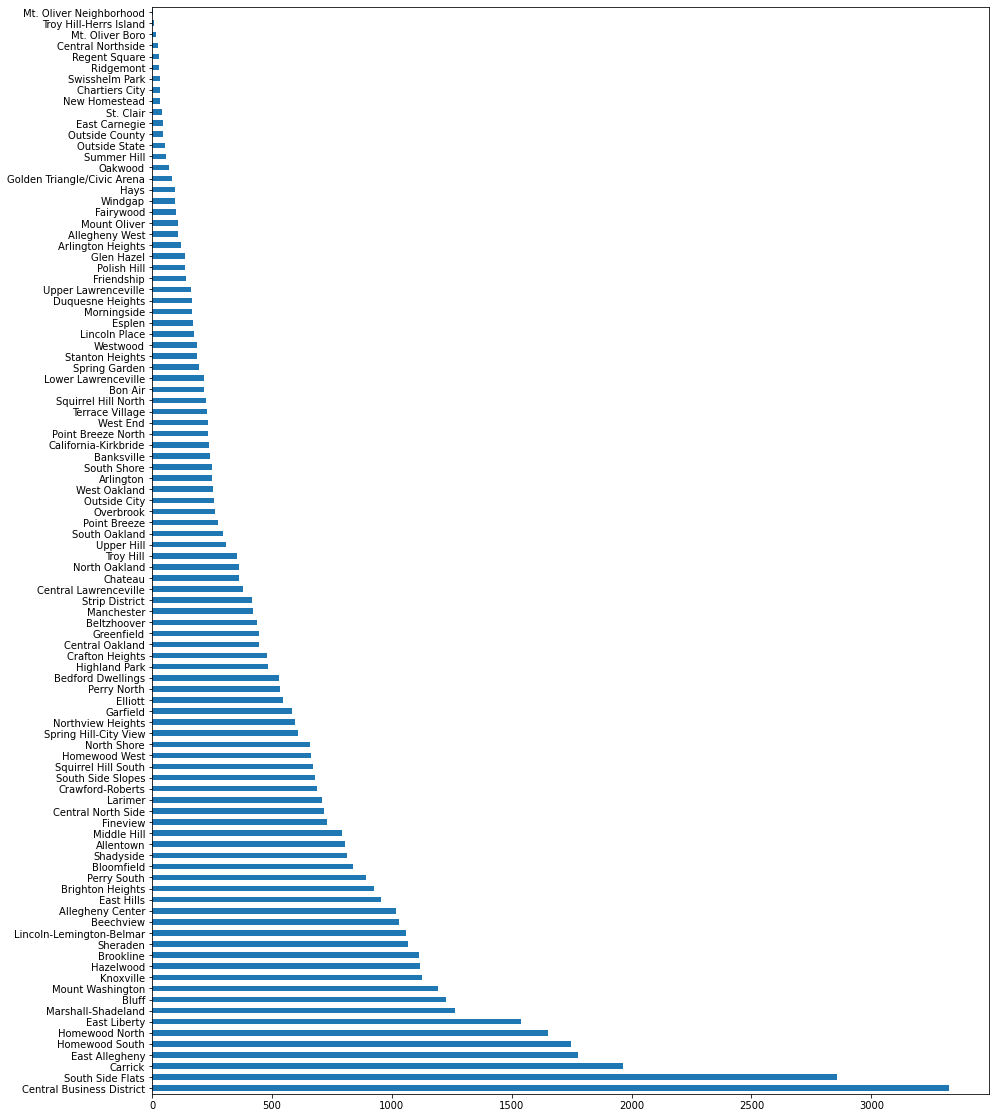

In [99]:
neighborhood = police["INCIDENTNEIGHBORHOOD"] 
neighborhood.head()
neighborhood = neighborhood.value_counts()
neighborhood.plot.barh(figsize = (15,20))

In [97]:
arrest_dict = {}

for hood, arrest in zip(police["INCIDENTNEIGHBORHOOD"],police["OFFENSES"]):
    if (isinstance(arrest, str) and isinstance(hood, str) and ('Damages' in arrest or 'Murder' in arrest or 'Endangering' in arrest or 
    'Assault' in arrest or 'Theft' in arrest or 'Burglary' in arrest or 'Robbery' in arrest or 'Terrorist' in arrest)):
        if hood in arrest_dict and hood != '':
            arrest_dict[hood] += 1
        else:
            arrest_dict[hood] = 1 

print(arrest_dict)

{'Bloomfield': 382, 'Westwood': 114, 'Crafton Heights': 284, 'Greenfield': 222, 'Brookline': 598, 'Regent Square': 9, 'East Liberty': 894, 'East Hills': 506, 'Carrick': 913, 'Allegheny Center': 233, 'South Side Flats': 1215, 'East Carnegie': 25, 'Golden Triangle/Civic Arena': 44, 'Point Breeze North': 95, 'Perry South': 373, 'Allentown': 326, 'Central Oakland': 246, 'Strip District': 189, 'Lincoln-Lemington-Belmar': 546, 'Troy Hill-Herrs Island': 3, 'Homewood North': 594, 'Northview Heights': 297, 'Brighton Heights': 434, 'Hazelwood': 470, 'Perry North': 281, 'Bedford Dwellings': 306, 'Sheraden': 582, 'Beechview': 546, 'East Allegheny': 445, 'Spring Hill-City View': 321, 'Fineview': 191, 'Marshall-Shadeland': 664, 'Point Breeze': 128, 'Terrace Village': 144, 'Arlington': 146, 'South Side Slopes': 253, 'Homewood South': 509, 'Garfield': 270, 'Lincoln Place': 102, 'Elliott': 264, 'Mount Washington': 536, 'California-Kirkbride': 111, 'Banksville': 106, 'Bon Air': 62, 'Glen Hazel': 89, 'Hi

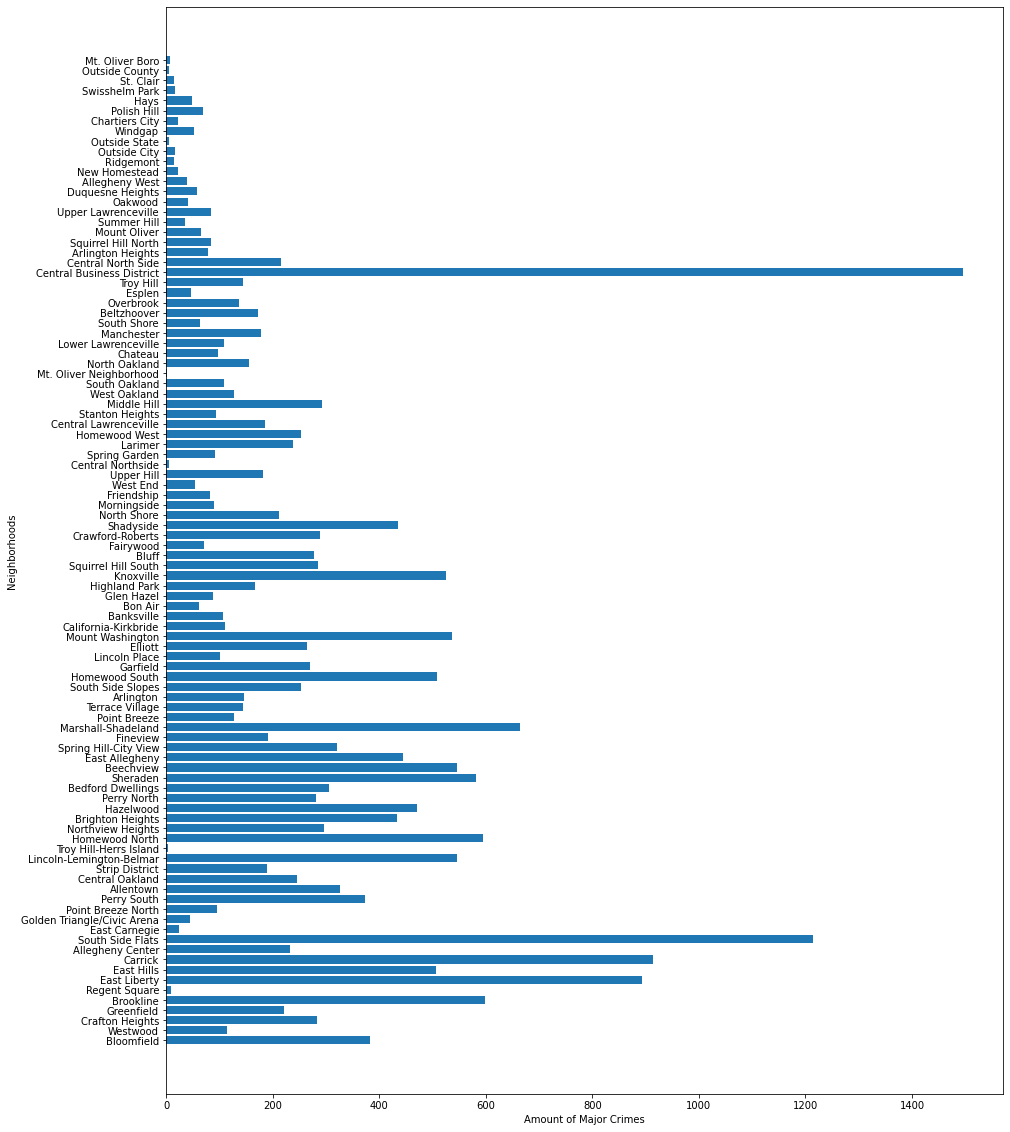

In [98]:
akeys = list(arrest_dict.keys())
avalues = list(arrest_dict.values())
plt.figure(figsize=(15,20))
plt.barh(range(len(arrest_dict)),avalues)
plt.yticks(range(len(arrest_dict)), akeys)
plt.xlabel("Amount of Major Crimes")
plt.ylabel("Neighborhoods")
plt.show()